In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import wandb

In [212]:
# project = "Elissabeth Long Lookup 2"
project = "Elissabeth Copying"
model_id = "l37t8qtb"

In [213]:
api = wandb.Api()
run = api.run(f"krieg-team/{project}/{model_id}")

In [214]:
def get_metric(name: str) -> np.ndarray:
    return np.array([row[name] for row in run.scan_history(keys=[name])])

In [215]:
train_acc = get_metric("train/accuracy")
val_acc = get_metric("validation/accuracy")

train_loss = get_metric("train/loss")
val_loss = get_metric("validation/loss")

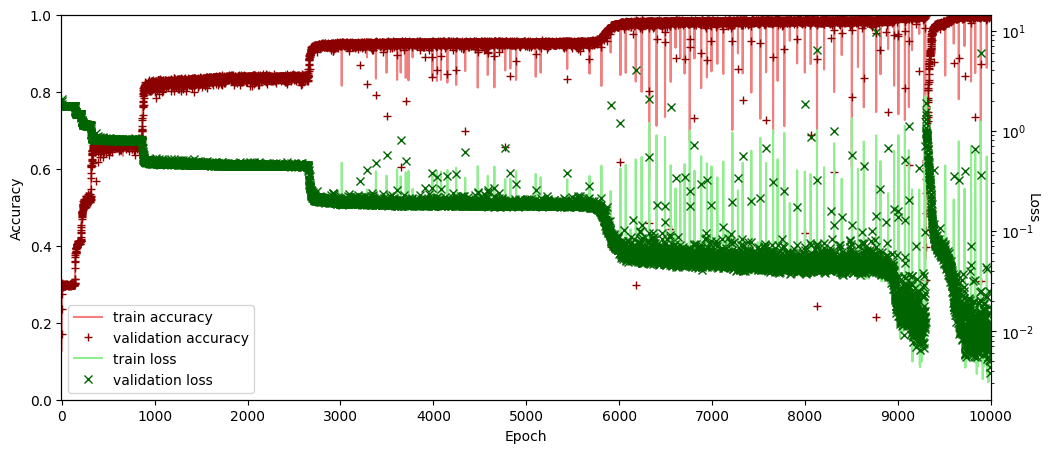

In [216]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.plot(train_acc, "-", label="train accuracy", color="lightcoral")
ax.plot(val_acc, "+", label="validation accuracy", color="darkred")
ax.plot([], "-", label="train loss", color="lightgreen")
ax.plot([], "x", label="validation loss", color="darkgreen")
ax.set_xlabel("Epoch")
ax.set_ylim(0, 1.0)
ax.set_ylabel("Accuracy")
ax.set_xlim(-5, train_acc.shape[0]+5)
ax.set_xticks([i*1000 for i in range(train_acc.shape[0]//1000+1)])
ax.legend(loc="lower left")

twinax = ax.twinx()
twinax.plot(train_loss, "-", label="train loss", color="lightgreen")
twinax.plot(val_loss, "x", label="validation loss", color="darkgreen")
twinax.set_yscale("log")
# twinax.set_ylim(0, 5)
twinax.set_ylabel("Loss", rotation=270)

plt.savefig(
    Path.cwd() / f"metrics_{model_id}.pdf",
    bbox_inches="tight",
    facecolor=(0, 0, 0, 0),
)
plt.show()